In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from matplotlib import rcParams

rcParams['figure.figsize'] = 16, 9

In [2]:
#Read the dataset
df = pd.read_csv('WorldBank_Data1990_2021.csv')
df.head()

,Series Name,Series Code,Continent,Sub-Region,Country Name,Country Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,"Population, total",SP.POP.TOTL,Asia,Southern Asia,Afghanistan,AFG,10694796.0,10745167.0,12057433.0,14003760.0,...,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0
1,"Population, total",SP.POP.TOTL,Europe,Southern Europe,Albania,ALB,3286542.0,3266790.0,3247039.0,3227287.0,...,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0
2,"Population, total",SP.POP.TOTL,Africa,Northern Africa,Algeria,DZA,25518074.0,26133905.0,26748303.0,27354327.0,...,37260563.0,38000626.0,38760168.0,39543154.0,40339329.0,41136546.0,41927007.0,42705368.0,43451666.0,44177969.0
3,"Population, total",SP.POP.TOTL,Oceania,Polynesia,American Samoa,ASM,47818.0,48992.0,50078.0,51174.0,...,53691.0,52995.0,52217.0,51368.0,50448.0,49463.0,48424.0,47321.0,46189.0,45035.0
4,"Population, total",SP.POP.TOTL,Europe,Southern Europe,Andorra,AND,53569.0,55434.0,57283.0,59156.0,...,71013.0,71367.0,71621.0,71746.0,72540.0,73837.0,75013.0,76343.0,77700.0,79034.0


In [3]:
#Get all the Country names
#df.iloc[:,2:5]['Country Name'].unique()
CountryList = df.iloc[:,2:5].drop_duplicates(keep='last').dropna(axis=0)

In [4]:
#Get all the years
df_year = df.columns[6:].str[:4]
#df_year = df_year.str[:4]

In [5]:
#Let's see how many different indicator
series = df['Series Name'].unique()
df['Series Name'].nunique()

53

In [6]:
#Print all the indicator in the dataset
for i in range(0,df['Series Name'].nunique()):
    print(i,series[i])

0 Population, total
1 Population growth (annual %)
2 Surface area (sq. km)
3 Poverty headcount ratio at national poverty lines (% of population)
4 GNI, Atlas method (current US$)
5 GNI per capita, Atlas method (current US$)
6 GNI, PPP (current international $)
7 GNI per capita, PPP (current international $)
8 Income share held by lowest 20%
9 Life expectancy at birth, total (years)
10 Fertility rate, total (births per woman)
11 Adolescent fertility rate (births per 1,000 women ages 15-19)
12 Contraceptive prevalence, any method (% of married women ages 15-49)
13 Births attended by skilled health staff (% of total)
14 Mortality rate, under-5 (per 1,000 live births)
15 Prevalence of underweight, weight for age (% of children under 5)
16 Immunization, measles (% of children ages 12-23 months)
17 Primary completion rate, total (% of relevant age group)
18 School enrollment, secondary (% gross)
19 School enrollment, primary and secondary (gross), gender parity index (GPI)
20 Prevalence of H

In [7]:
#Let's re-shape the dataset so that each indicator is at it's own column. Countries and years in their own.
#Make it loop all the countries. Loop all the indicators with the year and rearrange to new dataframe.

df_conv = pd.DataFrame()
tt=pd.DataFrame()
df2=pd.DataFrame()

CountryCount = CountryList.shape[0]
for x in df_year:
    #CountryList['year'] = pd.to_datetime(df_year[x])
    CountryList['year'] = x
    df_conv = df_conv.append(CountryList,ignore_index = True)

#df_conv.sort_values(by = ['Country Name', 'year'], ascending = [True, True], na_position = 'first') 

for y in range(0,CountryCount):
    df_temp = df_conv[df_conv.iloc[:,2] == CountryList.iloc[y,2]]
    for x in range(0,51):
        tt[series[x]] = pd.DataFrame(df[(df['Series Name'] == series[x]) & (df['Country Name'] == CountryList.iloc[y,2])].iloc[:,6:].T)
        df_temp[series[x]] = tt[series[x]].set_axis(df_temp.index)
    df2 = df2.append(df_temp)
#df2.head()

C:\Users\marpulli\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
#Fill NaN using backward fill
df2.fillna(method="ffill",inplace=True)

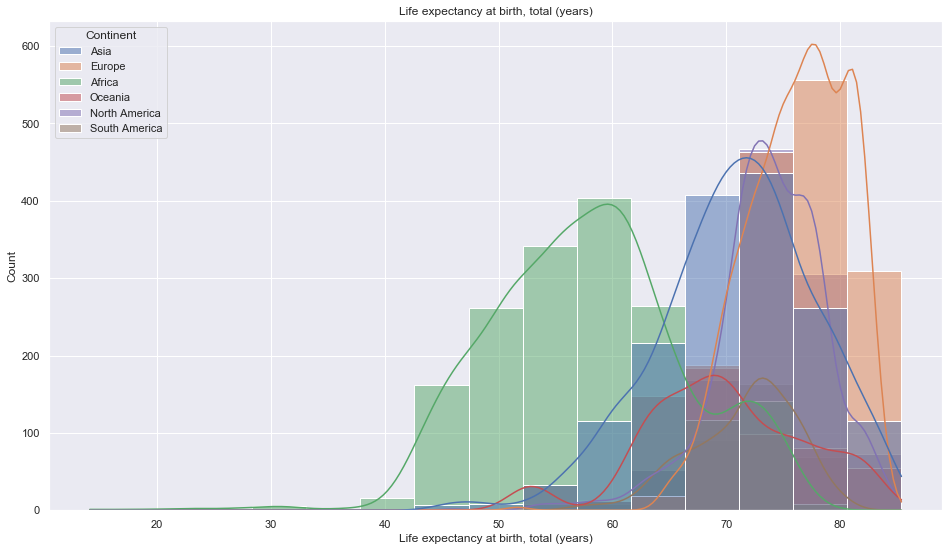

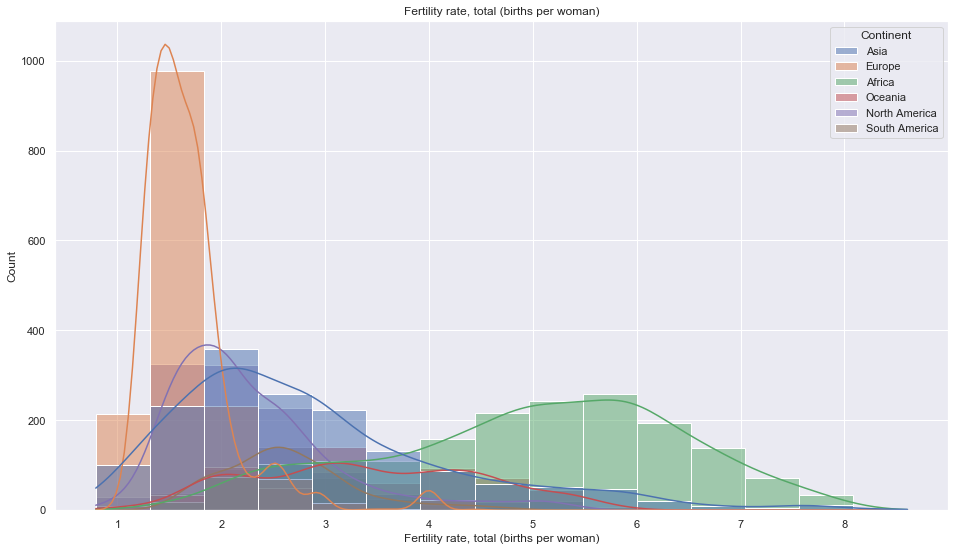

In [9]:
#Plot continent level histogram
sns.set(style="darkgrid")
for x in series[9:11]:
    #x = series[10]
    sns.histplot(data=df2, x=x, bins=15, hue='Continent', kde=True, cbar=True).set(title=x)
    plt.show()

In [12]:
#Plot indicators on interactive plot. Select two indicators for the scatter plot.
#df = px.data.gapminder()
x=series[9]
y=series[10]
fig = px.scatter(df2, x=x, y=y, animation_frame="year", animation_group="Country Name",
           size=series[0], color="Continent", hover_name="Country Name",
           log_x=False, size_max=55, range_x=[0,df2[x].max()//1], range_y=([0,df2[y].mean()//1]))

#fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()

Asia: High Correlated Indicators
GNI, Atlas method (current US$)               GDP (current US$)                              0.996226
Energy use (kg of oil equivalent per capita)  CO2 emissions (metric tons per capita)         0.975429
GNI, PPP (current international $)            GDP (current US$)                              0.933038
GNI, Atlas method (current US$)               GNI, PPP (current international $)             0.926623
Energy use (kg of oil equivalent per capita)  Electric power consumption (kWh per capita)    0.874860
Surface area (sq. km)                         Forest area (sq. km)                           0.872676
GNI per capita, Atlas method (current US$)    GDP per capita (current US$)                   0.861894
CO2 emissions (metric tons per capita)        Electric power consumption (kWh per capita)    0.853511
Population, total                             Forest area (sq. km)                           0.841955
                                              Sur

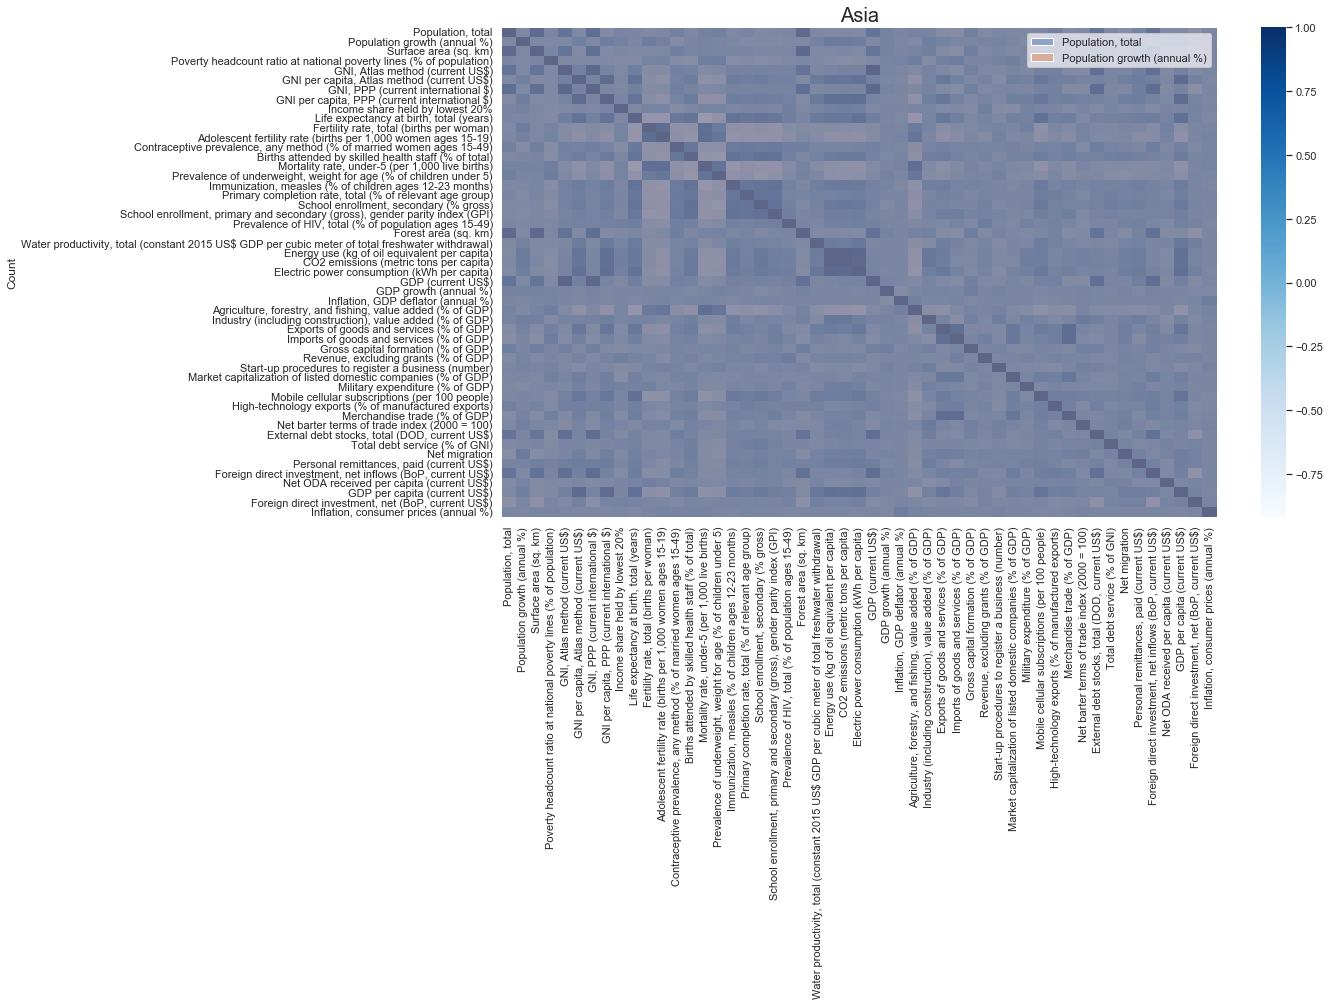

Europe: High Correlated Indicators
GNI, Atlas method (current US$)                  GDP (current US$)                                             0.991483
Surface area (sq. km)                            Forest area (sq. km)                                          0.964786
GNI, PPP (current international $)               GDP (current US$)                                             0.940047
GNI, Atlas method (current US$)                  GNI, PPP (current international $)                            0.936726
Mortality rate, under-5 (per 1,000 live births)  Agriculture, forestry, and fishing, value added (% of GDP)    0.895243
Energy use (kg of oil equivalent per capita)     Electric power consumption (kWh per capita)                   0.889754
Exports of goods and services (% of GDP)         Imports of goods and services (% of GDP)                      0.854121
Population, total                                GNI, PPP (current international $)                            0.752705
Infla

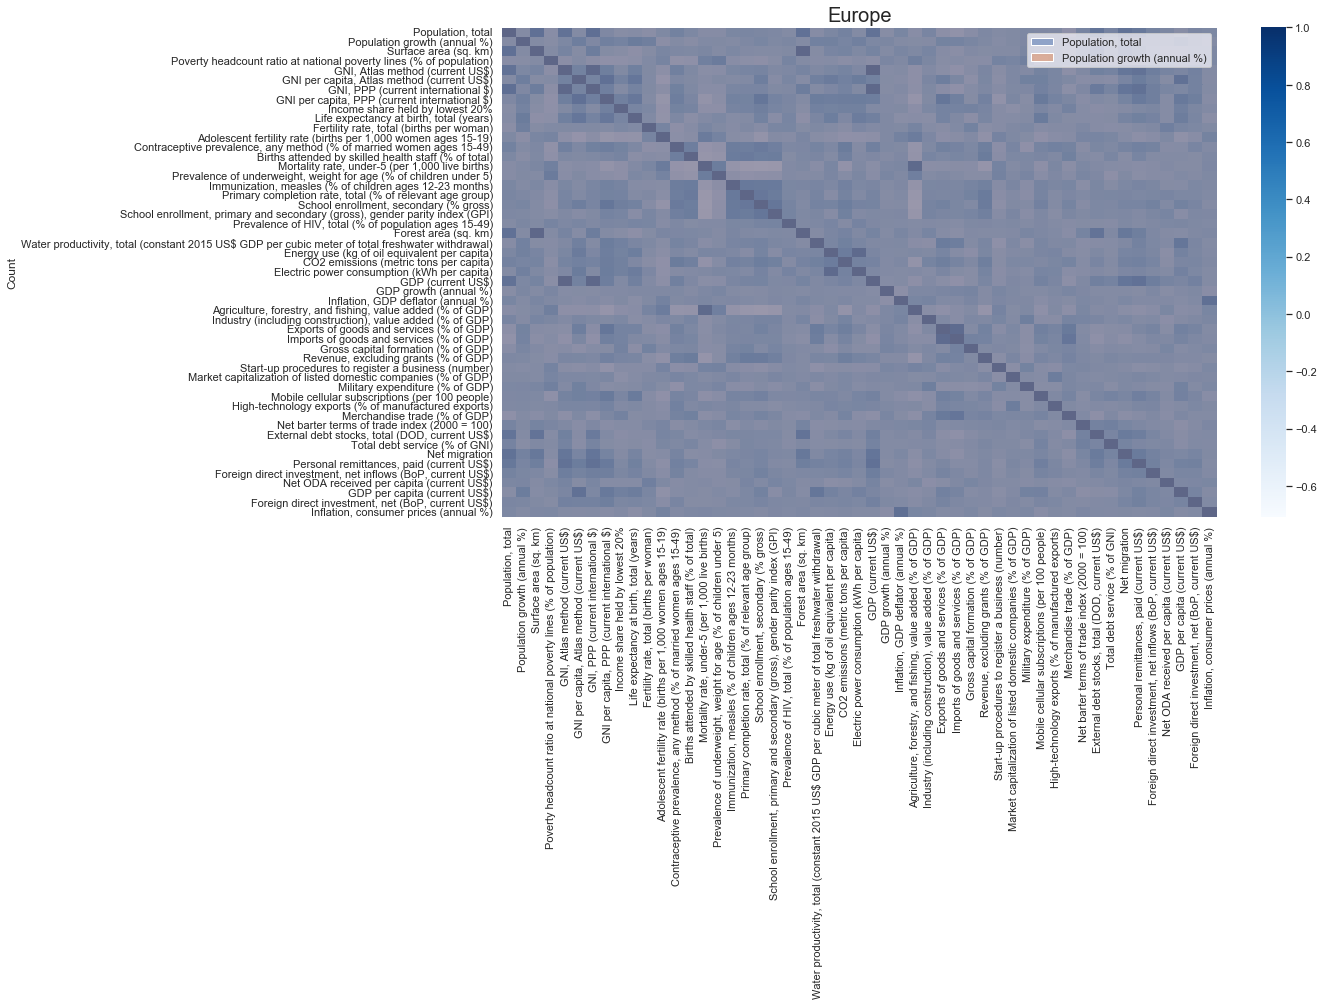

Africa: High Correlated Indicators
Inflation, GDP deflator (annual %)                             Inflation, consumer prices (annual %)                            0.993489
GNI per capita, Atlas method (current US$)                     GNI per capita, PPP (current international $)                    0.910161
GNI, PPP (current international $)                             GDP (current US$)                                                0.906966
GNI, Atlas method (current US$)                                GNI, PPP (current international $)                               0.897566
Fertility rate, total (births per woman)                       Mortality rate, under-5 (per 1,000 live births)                  0.832331
GNI, Atlas method (current US$)                                GDP (current US$)                                                0.806720
Exports of goods and services (% of GDP)                       Imports of goods and services (% of GDP)                         0.783038
Energy

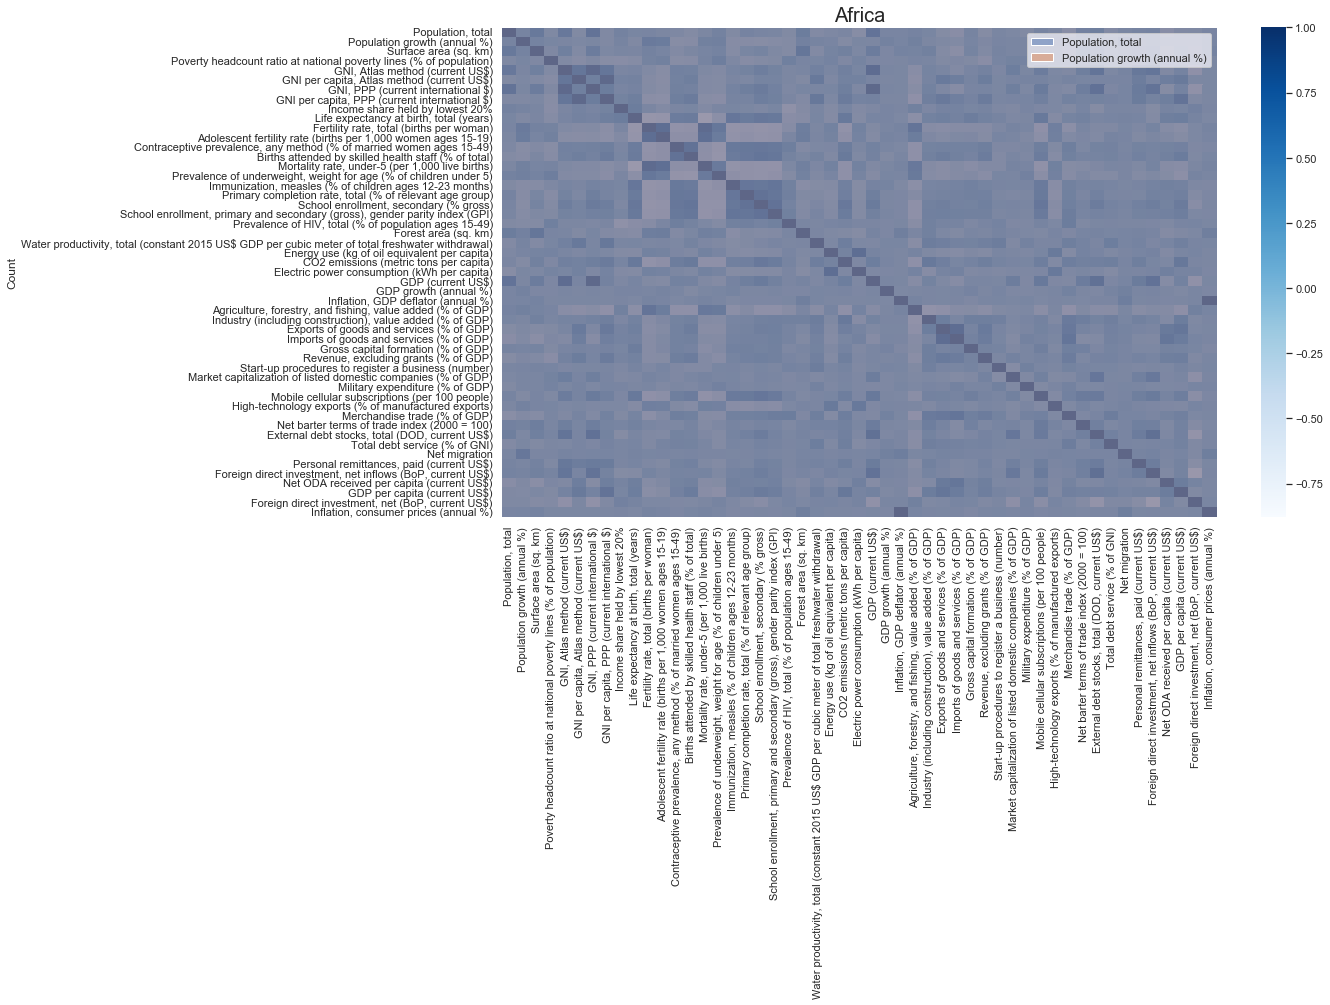

Oceania: High Correlated Indicators
Population, total                Forest area (sq. km)             0.975353
Surface area (sq. km)            Forest area (sq. km)             0.973536
Population, total                Surface area (sq. km)            0.946353
                                 Net migration                    0.906735
Forest area (sq. km)             Net migration                    0.869946
GNI, Atlas method (current US$)  GDP (current US$)                0.867837
Surface area (sq. km)            Net migration                    0.856134
GDP (current US$)                Net migration                    0.855775
Population, total                GDP (current US$)                0.812266
Forest area (sq. km)             Total debt service (% of GNI)    0.805794
dtype: float64




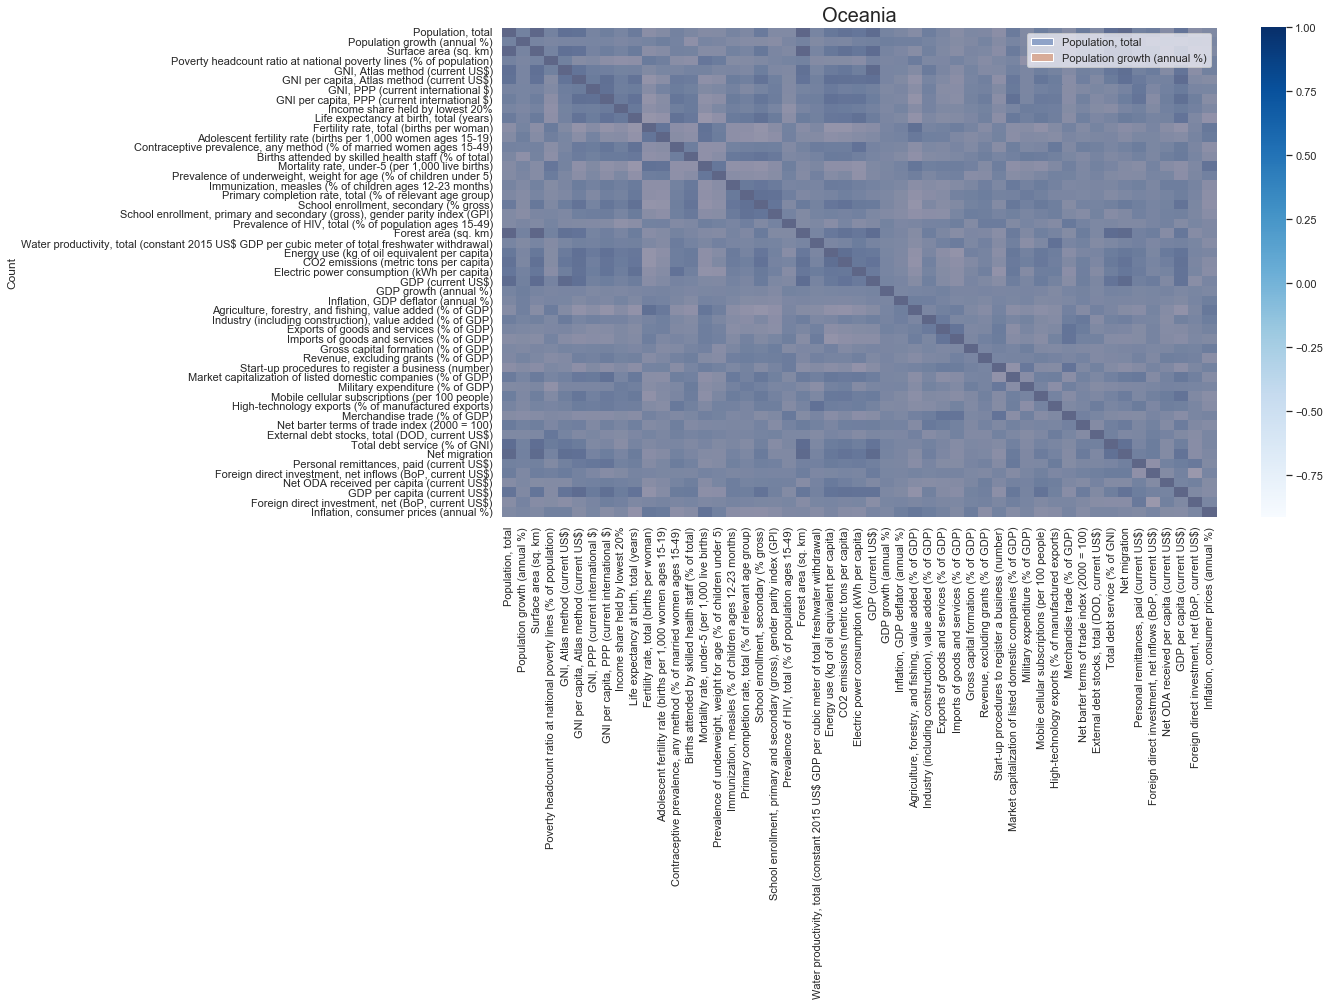

North America: High Correlated Indicators
GNI, Atlas method (current US$)           GDP (current US$)                           0.998344
Surface area (sq. km)                     Forest area (sq. km)                        0.997903
GNI, Atlas method (current US$)           GNI, PPP (current international $)          0.991182
GNI, PPP (current international $)        GDP (current US$)                           0.989035
GNI, Atlas method (current US$)           Personal remittances, paid (current US$)    0.987209
GDP (current US$)                         Personal remittances, paid (current US$)    0.986066
GNI, PPP (current international $)        Personal remittances, paid (current US$)    0.967712
Exports of goods and services (% of GDP)  Imports of goods and services (% of GDP)    0.926191
Population, total                         GDP (current US$)                           0.907651
                                          GNI, Atlas method (current US$)             0.904540
dtype: f

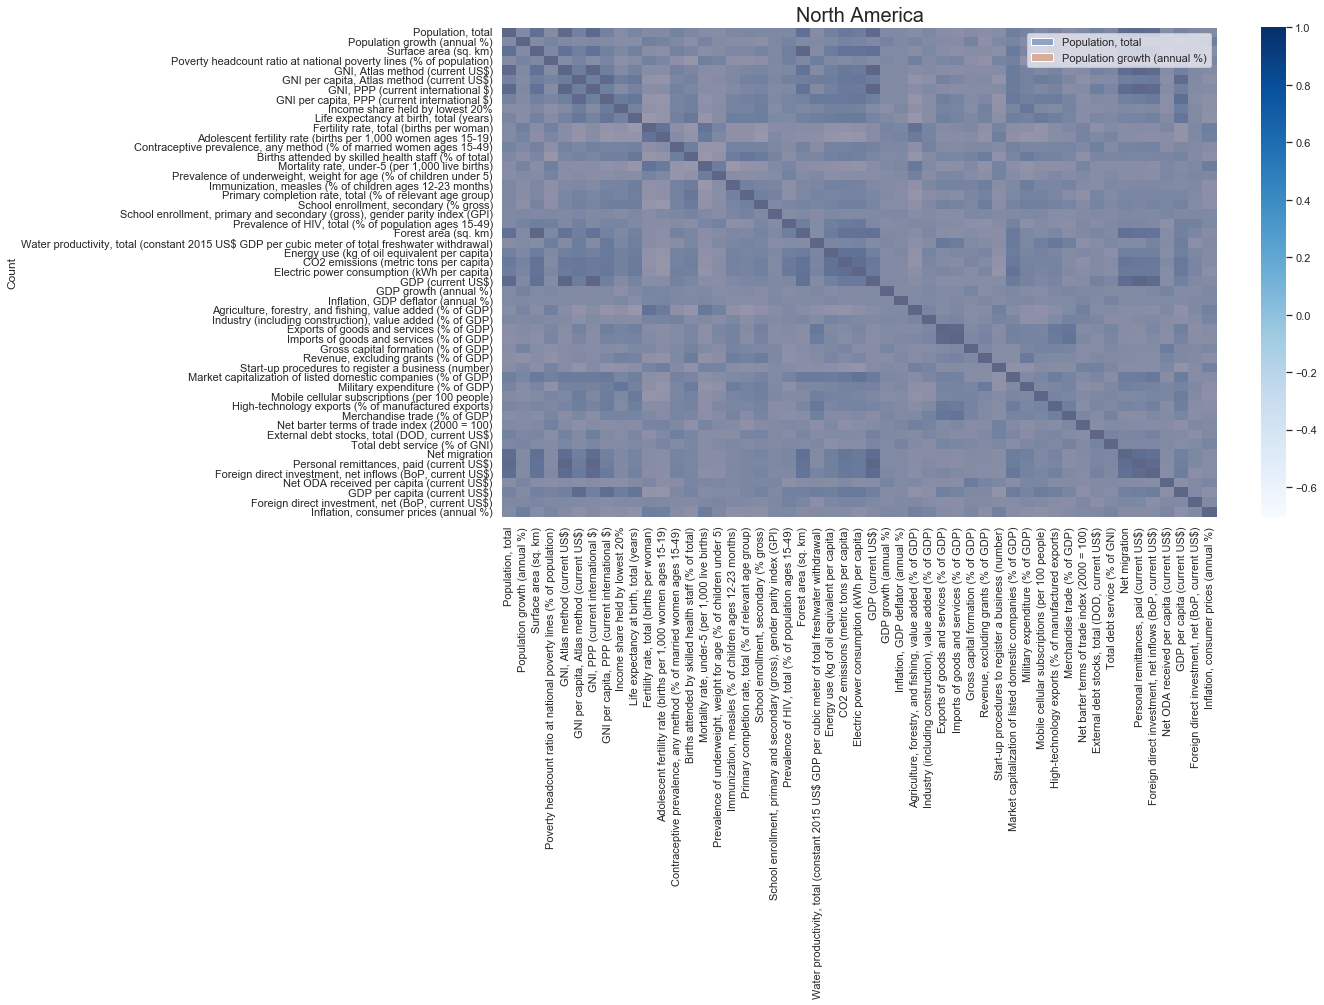

In [10]:
#Plot a heatmap for each continent. Let's see if any delta.
#df2 = df2.fillna(0)
continents = df['Continent'].unique()
for x in continents[0:5]:
    df2_cont = df2[df2['Continent'] == x]
    corr = df2_cont.corr()
    sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)).stack().sort_values(ascending=False))
    print(x,": High Correlated Indicators\n",  sol[0:10], "\n\n", sep='', flush=True)
    #plot the heatmap
    plt.title(x, fontsize=20)
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="Blues")
    #df2_cont.hist()
    sns.histplot(data = df2_cont.iloc[:,4:6])
    plt.show()